In [1]:
# load train and test data 
import pandas as pd

train_data_path = 'data/Train/'
trainX = pd.read_csv(train_data_path + 'X_train.txt',sep=" ", header=None).values
trainY = pd.read_csv(train_data_path + 'y_train.txt', header=None).values.ravel()

# test_data_path = 'data/Test/'
# testX = pd.read_csv(test_data_path + 'X_test.txt',sep=" ", header=None).values
# testY = pd.read_csv(test_data_path + 'y_test.txt', header=None).values

In [2]:
# if we don't have test data, run this cell
import numpy as np
def shuffle_train_data():
    global trainX, trainY
    train = np.zeros((trainX.shape[0], trainX.shape[1]+trainY.shape[1]))
    train[:,:-trainY.shape[1]] = trainX
    train[:,trainX.shape[1]:] = trainY
    np.random.shuffle(train)
    trainX = train[:,:-trainY.shape[1]]
    trainY = train[:,trainX.shape[1]:].ravel()

def seprate_test_train(trainX, trainY, ratio=0.8, shuffle=False):
    if shuffle:
        shuffle_train_data()
    offset= np.int(trainX.shape[0]*ratio)
    testX = trainX[offset:, :]
    trainX = trainX[:offset, :]
    testY = trainY[offset:]
    trainY = trainY[:offset]
    return trainX, trainY, testX, testY

trainX, trainY, testX, testY = seprate_test_train(trainX, trainY)

In [3]:
from sklearn.preprocessing import StandardScaler
def make_standard():
    global trainX, testX
    sc = StandardScaler()
    trainX = sc.fit_transform(trainX)
    testX = sc.transform(testX)
make_standard()

In [4]:
import matplotlib.pyplot as plt

def plot(name, t, x):
    plt.plot(t, x)
    plt.legend([name], loc='upper left')
    plt.show() 
    
def plot2(name1, name2, t, x, y):
    plt.plot(t, x)
    plt.plot(t, y)
    plt.legend([name1, name2], loc='upper left')
    plt.show()
    
    
def plotN(names, t, x):
    for i in range(len(names)):
        plt.plot(t, x[i])
    plt.legend(names, loc='upper left')
    plt.show()



<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
  دسته‌بندی
    <br>
    سوال اول:
</font>
</div>

<div style="direction:rtl;line-height:200%;"><font face="XB Zar" size=3>
 5 دسته بند نام برده شده در ادامه آمده و دقت آنها بر روی داده‌های تست و آموزش  محاسبه‌شده‌است همچنین برای تنظیم پارامترها، برای هر دسته‌بند یک پارامتر را با تست cross validation بر روی داده‌های آموزش به دست آورده و مقداری پارامتری که مجموع مجذور خطای کمتری داشت به صورت مقدار پیش فرض هر پارامتر در تابع train آن نوشته‌شده‌است.   
 
 <br>
 برای شبکه عصبی همانطور که گفته‌شده کتابخانه کراس را پیاده کردیم ولی به علت مشکلاتی که در نصب tensorflow داشتیم اجرا نشد برای همین از کتابخانه sklearn استفاده کردیم.
</font>
</div>
    

In [5]:

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

class classifier:
    global trainX, trainY, testX, testY
    
    def __init__(self):
        self.trainX, self.trainY, self.testX, self.testY = trainX, trainY, testX, testY
        self.clf = None
        
        
    def train(self):
        pass
        
    def train_accuracy(self):
        return self.clf.score(self.trainX, self.trainY)
        
    
    def test_accuracy(self):
        return self.clf.score(self.testX, self.testY)
    
    def MSE(self):
        predictY = self.clf.predict(self.testX)
        return mean_squared_error(self.testY, predictY)
    
    def zero_parameter_number(self):
        try:
            return np.where(self.clf.coef_<10**-6)[0].shape[0]
        except AttributeError:
            return np.sum([np.where(self.clf.coefs_[i] < 10 ** -6)[0].shape[0] for i in range(len(self.clf.coefs_))])
        
    def cross_validation(self, cv=5):
        scores = cross_validate(self.clf, self.trainX, self.trainY, cv=cv, scoring=('neg_mean_squared_error'),
                                return_train_score=True)
        return -1 * np.max(scores['test_score'])

    

Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

class logistic_regression(classifier):
    def __init__(self):
        self.trainX, self.trainY, self.testX, self.testY = trainX, trainY, testX, testY
        self.train()

    def train(self, penalty='l1', C=np.inf, loss=True, max_iter=50):
        self.clf = LogisticRegression(penalty=penalty, C=C, multi_class='multinomial', solver='saga')
        self.clf.fit(self.trainX, self.trainY)      
    
  
      
lr = logistic_regression()
print('train accuracy is:')
print(lr.train_accuracy())
print('test accuracy is:')
print(lr.test_accuracy())

train accuracy is:
0.9785932721712538
test accuracy is:
0.9568854568854569


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

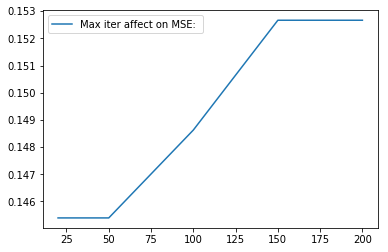

In [11]:
# cross validation for iters
iters = [20, 50, 100, 150, 200]
MSEs = list()
for i in iters:
    lr.train(max_iter=i)
    MSEs.append(lr.cross_validation())
plot('Max iter affect on MSE: ', iters, MSEs)

Random Forest:

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
class random_forest(classifier):
    def __init__(self):
        self.trainX, self.trainY, self.testX, self.testY = trainX, trainY, testX, testY
        self.train()

    def train(self, n_estimators=100, max_depth=400):
        self.clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
        self.clf.fit(self.trainX, self.trainY)
        
    def feature_importance(self, k):
        features = self.clf.feature_importances_
        min_k = np.sort(features)[-k]

        return np.where(features>min_k)
        
            
        
rf = random_forest()
print('train accuracy is:')
print(rf.train_accuracy())
print('test accuracy is:')
print(rf.test_accuracy())  

train accuracy is:
1.0
test accuracy is:
0.9581724581724582


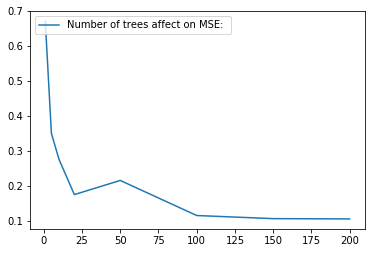

In [8]:
# cross validation for n_estimators
n_estimators = [1, 5, 10, 20, 50, 100, 150, 200]
MSEs = list()
for n_estimator in n_estimators:
    rf.train(n_estimators=n_estimator)
    MSEs.append(rf.cross_validation())
plot('Number of trees affect on MSE: ', n_estimators, MSEs)

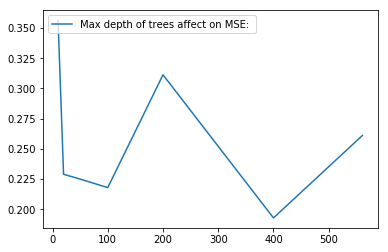

In [77]:
# cros validation for max depth
max_depth = [10, 20, 50, 100, 200, 400, 561]
MSEs = list()
for depth in max_depth:
    rf.train(max_depth = depth)
    MSEs.append(rf.cross_validation())
plot('Max depth of trees affect on MSE: ', max_depth, MSEs) 

SVM

In [12]:
from sklearn.svm import LinearSVC

class svm(classifier):
    def __init__(self):
        self.trainX, self.trainY, self.testX, self.testY = trainX, trainY, testX, testY
        self.train()

    def train(self, penalty='l2', C=np.inf, loss='l2', max_iter=1000):
        self.clf = LinearSVC(penalty=penalty, C=C, loss=loss)
        self.clf.fit(self.trainX, self.trainY)
        
s = svm()
print('train accuracy is:')
print(s.train_accuracy())
print('test accuracy is:')
print(s.test_accuracy())  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\classes.py:219: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)


train accuracy is:
0.9964590375020119
test accuracy is:
0.9652509652509652


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\classes.py:219: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\classes.py:219: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\classes.py:219: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\classes.py:219: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationW

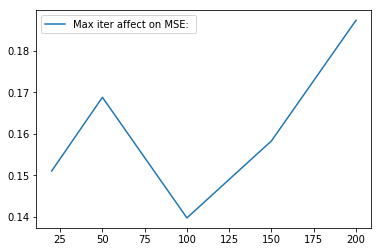

In [13]:
# cross validation for iters
iters = [20, 50, 100, 150, 200]
MSEs = list()
for i in iters:
    s.train(max_iter=i)
    MSEs.append(s.cross_validation())
plot('Max iter affect on MSE: ', iters, MSEs)

In [39]:
loss = ['l2', 'l1']
for l in loss:
    s.train(loss=l)
    print('loss= ', l, ', MSE= ', s.cross_validation())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\classes.py:219: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)


loss=  l2 , MSE=  0.18734987990392313


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\classes.py:219: DeprecationWarning: loss='l1' has been deprecated in favor of loss='hinge' as of 0.16. Backward compatibility for the loss='l1' will be removed in 1.0
  DeprecationWarning)


loss=  l1 , MSE=  0.210016155088853


Adaboost

In [16]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

class adaboost(classifier):
    def __init__(self):
        self.trainX, self.trainY, self.testX, self.testY = trainX, trainY, testX, testY
        self.train()

    def train(self, n_estimators=20, learning_rate=0.1, max_depth=10):
        self.clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=max_depth), n_estimators=n_estimators, learning_rate=learning_rate)
        self.clf.fit(self.trainX, self.trainY)
        
            
        
ad = adaboost()
print('train accuracy is:')
print(ad.train_accuracy())
print('test accuracy is:')
print(ad.test_accuracy())  

train accuracy is:
0.6505713825849027
test accuracy is:
0.6074646074646075


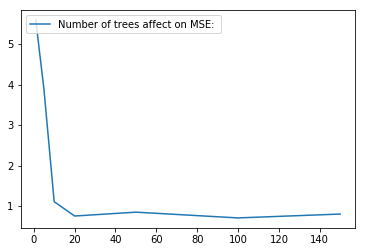

In [12]:
# cross validation for n_estimators
n_estimators = [1, 5, 10, 20, 50, 100, 150]
MSEs = list()
for n_estimator in n_estimators:
    ad.train(n_estimators=n_estimator)
    MSEs.append(ad.cross_validation())
plot('Number of trees affect on MSE: ', n_estimators, MSEs)

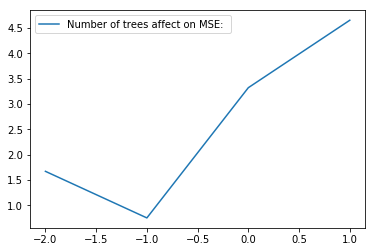

In [13]:
# cross validation for learning_rate
rates = [0.01, 0.1, 1, 10]
rates_log = np.log10(rates)
MSEs = list()
for rate in rates:
    ad.train(learning_rate=rate)
    MSEs.append(ad.cross_validation())
plot('Number of trees affect on MSE: ', rates_log, MSEs)

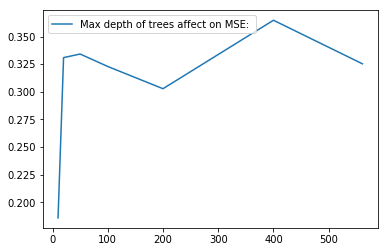

In [17]:
# cros validation for max depth
max_depth = [10, 20, 50, 100, 200, 400, 561]
MSEs = list()
for depth in max_depth:
    ad.train(max_depth = depth)
    MSEs.append(ad.cross_validation())
plot('Max depth of trees affect on MSE: ', max_depth, MSEs) 

Fully connected Neural Network:

In [34]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

# create model
model = Sequential()
model.add(Dense(100, input_dim=trainX.shape[1], activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(50, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# compile
model.compile(loss='binary_crossentropy',optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(trainX, trainY, epochs=3, verbose=0, batch_size=100, validation_data=(testX, testY))


C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [7]:
from sklearn.neural_network import MLPClassifier

class neural_network(classifier):
    def __init__(self):
        self.trainX, self.trainY, self.testX, self.testY = trainX, trainY, testX, testY
        self.train()

    def train(self, C=0.01, learning_rate ='constant', max_iter=150,a=300, b=200):
        self.clf = clf = MLPClassifier(solver='adam', learning_rate=learning_rate,
                                       max_iter= max_iter,
                                       alpha=C, hidden_layer_sizes=(a, b))
        self.clf.fit(self.trainX, self.trainY)
        
        
nn = neural_network()
print('train accuracy is:')
print(nn.train_accuracy())
print('test accuracy is:')
print(nn.test_accuracy())  

train accuracy is:
0.8691453404152584
test accuracy is:
0.8275418275418276


In [47]:
# cross validation for learning_rate
rates = ['constant', 'invscaling', 'adaptive']

MSEs = list()
for rate in rates:
    nn.train(learning_rate=rate)
    print('learning rate= ', rate, 'MSE =' , nn.cross_validation())
    

learning rate=  constant MSE = 0.08166533226581266
learning rate=  invscaling MSE = 0.1348314606741573
learning rate=  adaptive MSE = 0.14606741573033707


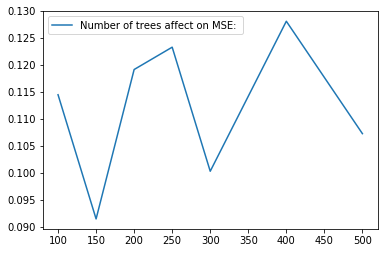

In [59]:
# cross validation for iteration
max_iters = [100, 150, 200, 250, 300, 400, 500]
MSEs = list()
for max_iter in max_iters:
    nn.train(max_iter=max_iter)
    MSEs.append(nn.cross_validation())
plot('Number of trees affect on MSE: ', max_iters, MSEs)

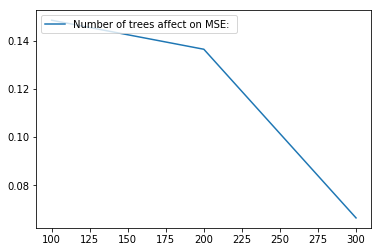

In [50]:
# cross validation for a
A = [100, 200, 300, trainX.shape[1]]
nn = neural_network()
MSEs = list()
for a in A:
    nn.train(a=a)
    MSEs.append(nn.cross_validation())
plot('Number of trees affect on MSE: ', A, MSEs)

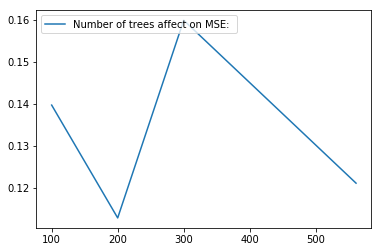

In [11]:
# cross validation for b
B = [100, 200, 300, trainX.shape[1]]
nn = neural_network()
MSEs = list()
for b in B:
    nn.train(b=b)
    MSEs.append(nn.cross_validation())
plot('Number of trees affect on MSE: ', B, MSEs)

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
    سوال دوم:
</font>
    <br>
    <font face="XB Zar" size=3> 
        همانطور که در تصاویر آمده است l1 مقدار پارامتر صفر بیشتری از l2 دارد چرا که شکل l1 چند گوشه‌ای است که گوشه‌های اش بر محورهای مختصات قرار دارد و هنگام پیدا کردن محل برخورد l1 با نمودار اصلی، بیشتر در همین گوشه‌ها شاهد آن هستیم.
        ولی شکل l2 شبیه دایره است و این اتفاق برایش نمی افتد و به نوعی پارامترهای l1 spareتر است.
        <br>
     با زیاد شدن لاندا (که وارون C هست و C کاهش می‌یابد.) واریانس بیشتر شده که موجب می‌شود که MSE بر روی داده‌ها بیشتر شود.همچنین با زیاد شدن لاندا، تعداد بیشتر از پارامترهای l1  صفر می‌شود این به خاطر پیچیده شدن دسته‌بند می‌باشد.
        <br> 
        
        </font>
</div>

In [7]:
def norm(clf, landas, ntype='l1'):
    Cs = [1/i for i in landas]

    errors = list()
    zero_params = list()

    for C in Cs:
        if ntype == 'n':
            clf.train(C=C) 
        else:
            clf.train(ntype, C)
        errors.append(clf.MSE())
        zero_params.append(clf.zero_parameter_number())
    return errors, zero_params


Logistic Regression Requlariztion:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


l1 norm: 


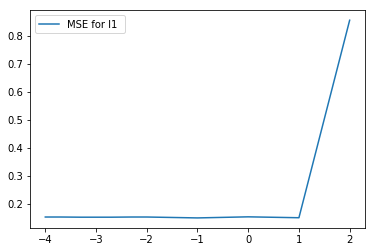

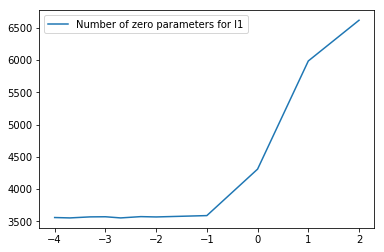

l2 norm: 


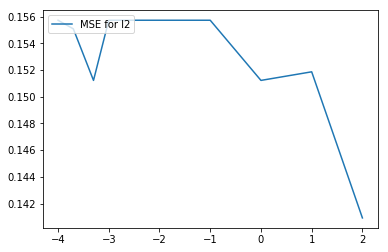

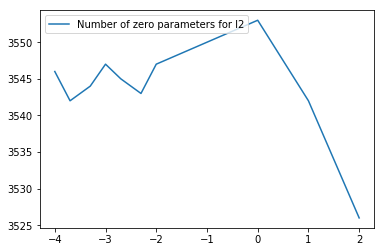

In [15]:
landas = [10**-4, 2*10**-4, 5*10**-4, 10**-3, 2*10**-3, 5*10**-3, 10**-2, 0.1, 1, 10, 100]
log_landa = np.log10(landas)
lr = logistic_regression()

print('l1 norm: ')
errors, zero_params = norm(lr, landas, 'l1')
plot('MSE for l1 ', log_landa, errors)
plot('Number of zero parameters for l1', log_landa, zero_params)
print('l2 norm: ')
errors, zero_params = norm(lr, landas, 'l2')
plot('MSE for l2', log_landa, errors)
plot('Number of zero parameters for l2', log_landa, zero_params)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


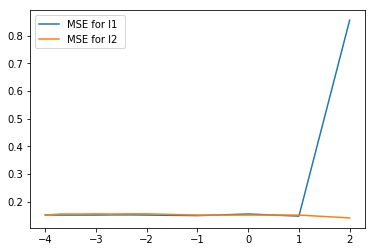

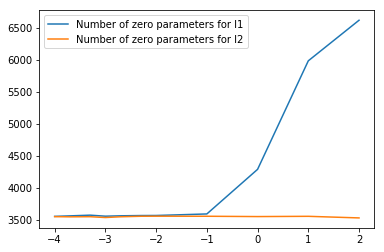

In [12]:
landas = [10**-4, 2*10**-4, 5*10**-4, 10**-3, 2*10**-3, 5*10**-3, 10**-2, 0.1, 1, 10, 100]
log_landa = np.log10(landas)
lr = logistic_regression()

errors1, zero_params1 = norm(lr, landas, 'l1')
errors2, zero_params2 = norm(lr, landas, 'l2')
plot2('MSE for l1 ', 'MSE for l2', log_landa, errors1, errors2)
plot2('Number of zero parameters for l1','Number of zero parameters for l2', log_landa, zero_params1, zero_params2)


LinearSVM

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\classes.py:219: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)


l2 norm: 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\classes.py:219: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\classes.py:219: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\classes.py:219: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\classes.py:219: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationW

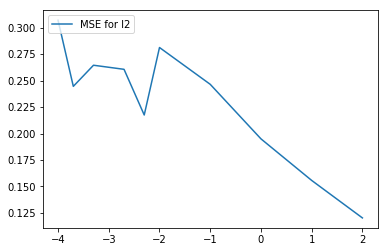

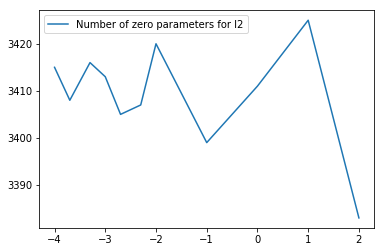

In [41]:
landas = [10**-4, 2*10**-4, 5*10**-4, 10**-3, 2*10**-3, 5*10**-3, 10**-2, 0.1, 1, 10, 100]
log_landa = np.log10(landas)
s = svm()

print('l1 norm: ')
errors, zero_params = norm(s, landas, 'l1')
plot('MSE for l1 ', log_landa, errors)
plot('Number of zero parameters for l1', log_landa, zero_params)
print('l2 norm: ')
errors, zero_params = norm(s, landas, 'l2')
plot('MSE for l2', log_landa, errors)
plot('Number of zero parameters for l2', log_landa, zero_params)


Neural Network

l2 norm: 


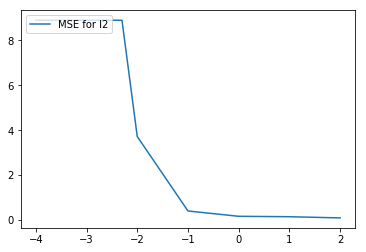

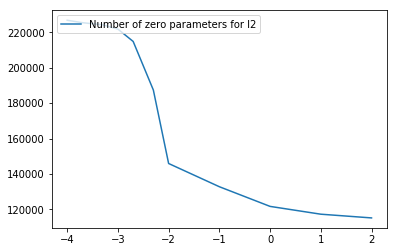

In [8]:
landas = [10**-4, 2*10**-4, 5*10**-4, 10**-3, 2*10**-3, 5*10**-3, 10**-2, 0.1, 1, 10, 100]
log_landa = np.log10(landas)
nn = neural_network()


print('l2 norm: ')
errors, zero_params = norm(nn, landas, 'n')
plot('MSE for l2', log_landa, errors)
plot('Number of zero parameters for l2', log_landa, zero_params)


<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
    سوال سوم:
</font>
    <br>
    <font face="XB Zar" size=3>
 در تمام شکل‌ها مشهود است که با بیشتر کردن تعداد داده‌های آموزش MSE کاهش می‌یابد چرا که داده‌های زیادتر و اطلاعات بیشتری داریم و generalization بیشتر می‌شود. 
</font>
</div>

In [12]:
def change_data_size(Ks, clf):
    global trainX, trainY, testX, testY
    MSEs = list()
    for k in Ks:
        offset = np.int(trainX.shape[0] * k)
        shuffle_train_data()
        clf.trainX = trainX[:offset, :]
        clf.trainY = trainY[:offset].ravel()
        clf.train()
        MSEs.append(clf.MSE())
    return MSEs

Varient train size in Logistic Regression:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


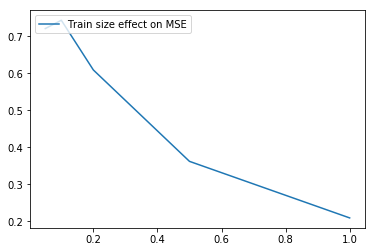

In [63]:
Ks = [0.05, 0.1, 0.2, 0.5, 1]
lr = logistic_regression()
errors = change_data_size(Ks, lr)
plot('Train size effect on MSE', Ks, errors)

Varient train size in Random Forest:

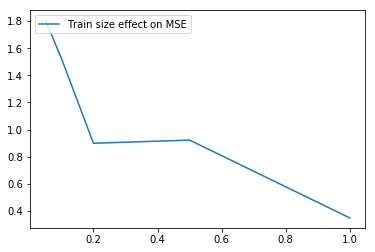

In [78]:
Ks = [0.05, 0.1, 0.2, 0.5, 1]
rf = random_forest()
errors = change_data_size(Ks, rf)
plot('Train size effect on MSE', Ks, errors)

Varient train size in SVM:

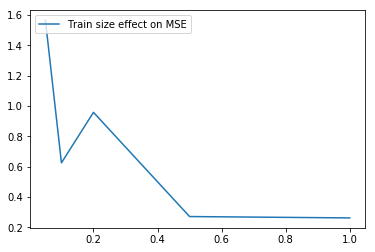

In [10]:
Ks = [0.05, 0.1, 0.2, 0.5, 1]
s = svm()
errors = change_data_size(Ks, s)
plot('Train size effect on MSE', Ks, errors)

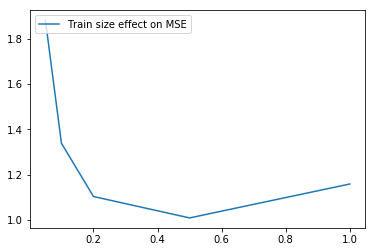

In [13]:
Ks = [0.05, 0.1, 0.2, 0.5, 1]
ad = adaboost()
errors = change_data_size(Ks, ad)
plot('Train size effect on MSE', Ks, errors)

Neural Network

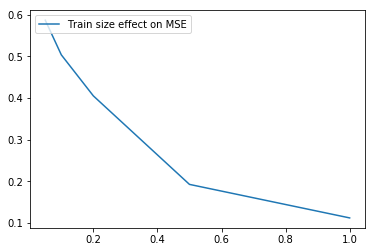

In [62]:
Ks = [0.05, 0.1, 0.2, 0.5, 1]
nn = neural_network()
errors = change_data_size(Ks, nn)
plot('Train size effect on MSE', Ks, errors)

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
    سوال چهارم:
</font>
    <br>
    <font face="XB Zar" size=3>
    4 الگوریتم استخراح ویژگی برای این قسمت پیاده سازی شده که از نوع Filter، الگوریتم selectkbest از نوع wrapper الگوریتم recursive feature elimiation و از نوع embedded الگوریتم select from model آمده و همچنین الگوریتم pca و برای random forest نیز از ویژگی feature importance آن پیاده سازی شده است.
        <br>
        چون در نسخه جدید select from model ما امکان انتخاب max feature را داشتیم و نسخه پایتون کوندا اجازه نصب نسخه جدید را نداد و این کدها را نرم افزار دیگری اجرا کرده و نتایج که نمودارند کنار پروژه ضمیمه شده است.
        <br> بعد از مقایسه بر اساس MSE الگوریتمی که بهتر بود برای هر دسته بند انتخاب کرده و در زیر نتایج اجرای الگوریتم بهتر بر روی هر دسته‌بند و دقت بر روی داده‌های آموزش و تست گزارش شده‌است.
        <br>
        همچنین الگوریتم recursive feature elimiation برای تمام الگوریتم‌ها خیلی طول می‌کشید لذا استفاده از آن بهینه نبود و آن را در مقایسه‌ها دخالت ندادیم.
        
        <br>
        از آنجایی که نرمالساز l1 برخی از پارامترها را صفر می‌کند میتواند برای feature selection استفاده شود و با صفر کردن برخی پارامترها تاثیر آنها در دسته‌بندی را از بین ببرد.
</font>
</div>

In [18]:
from sklearn.feature_selection import SelectKBest
def selectkbest(clf, k):
    fit = SelectKBest(k=k).fit(trainX, trainY)
    clf.trainX = fit.transform(trainX)
    clf.testX = fit.transform(testX)
    clf.train()
    return clf.MSE()

from sklearn.feature_selection import SelectFromModel
def select_form_model(classifier, k):
    model = SelectFromModel(classifier.clf, max_features=k).fit(trainX, trainY)
    classifier.trainX = model.transform(trainX)
    classifier.testX = model.transform(testX)
    classifier.train()
    return classifier.MSE()

from sklearn.feature_selection import RFE
def recursive_feature_elimination(classifier, k):
    selector = RFE(classifier.clf, k)
    selector = selector.fit(trainX, trainY)
    classifier.trainX = selector.transform(trainX)
    classifier.testX = selector.transform(testX)
    classifier.train()
    return classifier.MSE()   

from sklearn.decomposition import PCA
def pca(classifier, k):
    model = PCA(n_components=k).fit(trainX)
    classifier.trainX = model.transform(trainX)
    classifier.testX = model.transform(testX)
    classifier.train()
    return classifier.MSE()


In [26]:
def feature_selection(classifier, ls):
    
    algorithms = [selectkbest, recursive_feature_elimination, pca]
    MSEs = list()
    for algorithm in algorithms:
        mses = list()
        for l in ls:
            classifier.__init__()
            mses.append(algorithm(classifier, l))
        MSEs.append(mses)
    return MSEs

Random Forest

In [ ]:
def rf_feature_importance(classifier, k):
    features = classifier.feature_importance(k)[0]
    classifier.trainX = trainX[:, features]
    classifier.testX = testX[:, features]
    classifier.train()
    return classifier.MSE()

rf = random_forest()
mses = list()
ls = [5, 10, 50, 100, 561]
for l in ls:
    rf = random_forest()
    mses.append(rf_feature_importance(rf, l))

results = feature_selection(rf, ls)

results.append(mses)

plotN(['SelectKBest', 'recursive_feature_elimination', 'pca', 'feature_importance'], ls, results)

In [17]:
ls = [5, 10, 50, 100, 561]
for l in ls:
    rf = random_forest()
    print('Feature size is: ', l)
    features = rf.feature_importance(l)[0]
    rf.trainX = trainX[:, features]
    rf.testX = testX[:, features]
    rf.train()
    print('train accuracy is:')
    print(rf.train_accuracy())
    print('test accuracy is:')
    print(rf.test_accuracy())  

Feature size is:  5
train accuracy is:
0.998229518751006
test accuracy is:
0.7831402831402832
Feature size is:  10
train accuracy is:
0.9988733301142765
test accuracy is:
0.8854568854568855
Feature size is:  50
train accuracy is:
0.9998390471591824
test accuracy is:
0.9459459459459459
Feature size is:  100
train accuracy is:
0.9998390471591824
test accuracy is:
0.9465894465894465
Feature size is:  561
train accuracy is:
0.9996780943183647
test accuracy is:
0.9510939510939511


<div style="direction:rtl;line-height:300%;">
    <font face="XB Zar" size=3>
      برای دسته بند random forest بهترین الگوریتم استفاده از خود ویژگی feature importance این دسته بند بود که نتایج دقت بر روی داده‌های تست و آموزش در بالا گزازش شده است.
        <br>
        با بیشتر شدن تعداد ویژگی‌ها چون اطلاعات بیشتری برای دسته بندی داریم دقت نیز افزایش می‌یابد.
    </font>
</div>

Logistic Regression

In [ ]:
lr = logistic_regression()
ls = [5, 10, 50, 100, 561]
results = feature_selection(lr, ls)
plotN(['SelectKBest', 'recursive_feature_elimination', 'pca'], ls, results)

In [19]:
ls = [5, 10, 50, 100, 561]
for l in ls:
    lr = logistic_regression()
    model = PCA(n_components=l).fit(trainX)
    lr.trainX = model.transform(trainX)
    lr.testX = model.transform(testX)
    lr.train()
    print('train accuracy is:')
    print(lr.train_accuracy())
    print('test accuracy is:')
    print(lr.test_accuracy())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


train accuracy is:
0.7989699018187671
test accuracy is:
0.7902187902187903
train accuracy is:
0.8433928858844358
test accuracy is:
0.8371943371943372
train accuracy is:
0.9430226943505553
test accuracy is:
0.9214929214929215
train accuracy is:
0.9652341863833896
test accuracy is:
0.9414414414414415
train accuracy is:
0.9782713664896185
test accuracy is:
0.9568854568854569


<div style="direction:rtl;line-height:300%;">
    <font face="XB Zar" size=3>
        برای logistic regression بهترین الگوریتم استخراج ویژگی، pca به دست آمده است که دقت اعمال این الگوریتم بر روی داده‌های آموزش و تست در بالا آمده است و با بیشتر شدن تعداد ویژگی ها دقت بیشتر می‌شود.
    </font>
</div>

SVM

In [ ]:
s = svm()
ls = [5, 10, 50, 100, 561]
results = feature_selection(s, ls)
plotN(['SelectKBest', 'recursive_feature_elimination', 'pca'], ls, results)

In [20]:
ls = [5, 10, 50, 100, 561]
for l in ls:
    print('Feature size is: ', l)
    s = svm()
    model = PCA(n_components=l).fit(trainX)
    s.trainX = model.transform(trainX)
    s.testX = model.transform(testX)
    s.train()
    print('train accuracy is:')
    print(s.train_accuracy())
    print('test accuracy is:')
    print(s.test_accuracy())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\classes.py:219: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\classes.py:219: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)


train accuracy is:
0.581039755351682
test accuracy is:
0.5823680823680824


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\classes.py:219: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\classes.py:219: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)


train accuracy is:
0.7017543859649122
test accuracy is:
0.694980694980695


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\classes.py:219: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\classes.py:219: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)


train accuracy is:
0.9256397875422501
test accuracy is:
0.9086229086229086


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\classes.py:219: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\classes.py:219: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)


train accuracy is:
0.975857073877354
test accuracy is:
0.9382239382239382


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\classes.py:219: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\classes.py:219: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)


train accuracy is:
0.9975857073877354
test accuracy is:
0.9626769626769627


<div style="direction:rtl;line-height:300%;">
    <font face="XB Zar" size=3>
        برای svm بهترین الگوریتم استخراج ویژگی pca به دست آمده است که دقت اعمال این الگوریتم بر روی داده‌های آموزش و تست در بالا آمده است و با بیشتر شدن تعداد ویژگی ها دقت بیشتر می‌شود.
    </font>
</div>

Adaboost

In [ ]:
ad = adaboost()
ls = [5, 10, 50, 100, 561]
results = feature_selection(ad, ls)
plotN(['SelectKBest', 'l1_based', 'pca'], ls, results)

In [23]:
ls = [5, 10, 50, 100, 561]
for l in ls:
    print('Feature size is: ', l)
    ad = adaboost()
    fit = SelectKBest(k=l).fit(trainX, trainY)
    ad.trainX = fit.transform(trainX)
    ad.testX = fit.transform(testX)
    ad.train()
    print('train accuracy is:')
    print(ad.train_accuracy())
    print('test accuracy is:')
    print(ad.test_accuracy())

train accuracy is:
0.5440206019636247
test accuracy is:
0.5283140283140283
train accuracy is:
0.5432158377595364
test accuracy is:
0.5296010296010296
train accuracy is:
0.5107033639143731
test accuracy is:
0.4922779922779923
train accuracy is:
0.5131176565266377
test accuracy is:
0.49163449163449163
train accuracy is:
0.5201995815226139
test accuracy is:
0.5244530244530244


<div style="direction:rtl;line-height:300%;">
    <font face="XB Zar" size=3>
        برای adaboost بهترین الگوریتم انتخاب k ویژگی برتر به دست آمده است! که در بالا نتایج دقت بر روی داده‌های تست و آموزش آمده است.
    </font>
</div>

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
    سوال پنجم
</font>
</div>

Random Forest

In [24]:
rf = random_forest()
features = rf.feature_importance(10)[0]
rf.trainX = trainX[:, features]
rf.testX = testX[:, features]
rf.train()
print('train accuracy is:')
print(rf.train_accuracy())
print('test accuracy is:')
print(rf.test_accuracy())

train accuracy is:
0.9990342829550941
test accuracy is:
0.8886743886743886


Neural Network

In [8]:
nn = neural_network()
rf = random_forest()
features = rf.feature_importance(10)[0]
nn.trainX = trainX[:, features]
nn.testX = testX[:, features]
nn.train()
print('train accuracy is:')
print(nn.train_accuracy())
print('test accuracy is:')
print(nn.test_accuracy())

train accuracy is:
0.7411878319652342
test accuracy is:
0.7117117117117117
